In [1]:
#1928152 Animesh Pathak Assignment-9
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


plt.rcParams['figure.figsize'] = (12.0, 9.0)
df1 = pd.read_csv('C:\\Users\\KIIT\\Downloads\\boston.csv')
df1.describe()

scaler = MinMaxScaler()
df_norm = pd.DataFrame(scaler.fit_transform(df1), columns=df1.columns)
print("Normal Data")
print(df_norm)

Normal Data
     Unnamed: 0      crim    zn     indus  chas       nox        rm       age  \
0      0.000000  0.000000  0.18  0.067815   0.0  0.314815  0.577505  0.641607   
1      0.001980  0.000236  0.00  0.242302   0.0  0.172840  0.547998  0.782698   
2      0.003960  0.000236  0.00  0.242302   0.0  0.172840  0.694386  0.599382   
3      0.005941  0.000293  0.00  0.063050   0.0  0.150206  0.658555  0.441813   
4      0.007921  0.000705  0.00  0.063050   0.0  0.150206  0.687105  0.528321   
..          ...       ...   ...       ...   ...       ...       ...       ...   
501    0.992079  0.000633  0.00  0.420455   0.0  0.386831  0.580954  0.681771   
502    0.994059  0.000438  0.00  0.420455   0.0  0.386831  0.490324  0.760041   
503    0.996040  0.000612  0.00  0.420455   0.0  0.386831  0.654340  0.907312   
504    0.998020  0.001161  0.00  0.420455   0.0  0.386831  0.619467  0.889804   
505    1.000000  0.000462  0.00  0.420455   0.0  0.386831  0.473079  0.802266   

          dis  

In [2]:
df_norm.isnull().sum()

Unnamed: 0    0
crim          0
zn            0
indus         0
chas          0
nox           0
rm            0
age           0
dis           0
rad           0
tax           0
ptratio       0
black         0
lstat         0
medv          0
dtype: int64

In [3]:
X= pd.DataFrame(np.c_[df1['lstat'],df1['rm'],df1['black'],df1['ptratio'],df1['tax'],df1['rad'],df1['dis'],df1['age']
                      ,df1['nox'],df1['chas'],df1['indus'],df1['zn'],df1['crim']],
                columns=['lstat','rm','black','crim','zn','indus','chas','nox','age','dis','rad','tax','ptratio'])
Y= df1['medv']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=1)

print("Ridge")
ridgeE= []
for i in range(1,11):
    ridgeR = Ridge(alpha=i)
    ridgeR.fit(X_train,Y_train)
    Y_pred1=ridgeR.predict(X_test)
    
    rmse1=np.sqrt(mean_squared_error(Y_test,Y_pred1))
    ridgeE.append(rmse1)
    r2_1=r2_score(Y_test,Y_pred1)
    print('RMSE :',rmse1,'R2_SCORE: ',r2_1)
#print(Y_pred1)

Ridge
RMSE : 4.813222475577848 R2_SCORE:  0.7655800611077145
RMSE : 4.822766573476204 R2_SCORE:  0.7646494807966391
RMSE : 4.834487786733011 R2_SCORE:  0.7635041025928502
RMSE : 4.845698689254111 R2_SCORE:  0.7624059897361289
RMSE : 4.8561602154287185 R2_SCORE:  0.76137898445528
RMSE : 4.86596195033904 R2_SCORE:  0.7604147409925119
RMSE : 4.875220027960356 R2_SCORE:  0.759502194183716
RMSE : 4.884030474890619 R2_SCORE:  0.7586321584669024
RMSE : 4.892466818914058 R2_SCORE:  0.7577975933229605
RMSE : 4.900584803861281 R2_SCORE:  0.756993162020151


In [4]:
print(ridgeR.coef_)

[-0.58240763  3.0099428   0.00816315 -0.80782529 -0.0131365   0.27478587
 -1.23692264 -0.00763829 -2.14589906  1.40080085 -0.05796909  0.06022531
 -0.10300887]


[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]


Text(0, 0.5, 'Ridge Error')

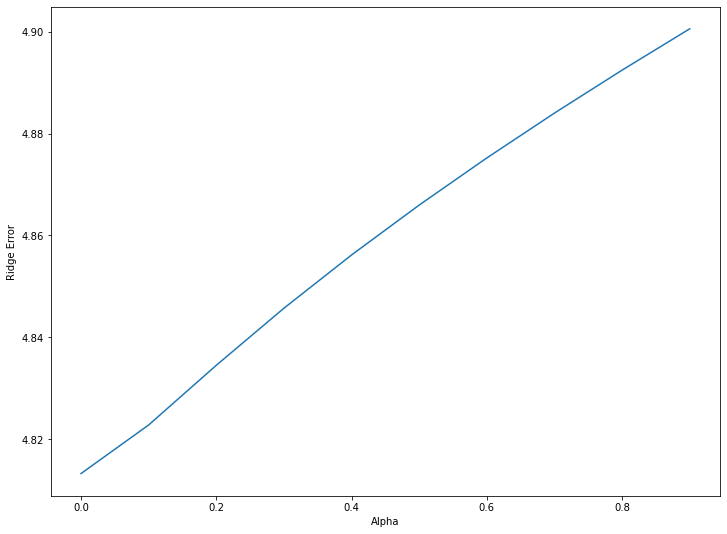

In [5]:
alphas = np.arange(0.0,1.0,0.1)
print(alphas)

plt.plot(alphas,ridgeE)
plt.xlabel('Alpha')
plt.ylabel('Ridge Error')

In [6]:
print("Lasso")
lassoE = []
for i in range(1,11):
    lasso = Lasso(alpha=i)
    lasso.fit(X_train,Y_train)
    Y_pred2=lasso.predict(X_test)
    rmse2=np.sqrt(mean_squared_error(Y_test,Y_pred2))
    lassoE.append(rmse2)
    r2_2=r2_score(Y_test,Y_pred2)
    print('RMSE :',rmse2,'R2_SCORE: ',r2_2)
#print(Y_pred2)

Lasso
RMSE : 5.964727893384386 R2_SCORE:  0.6399987995786804
RMSE : 6.373284185213928 R2_SCORE:  0.5889929752759417
RMSE : 6.606903140710906 R2_SCORE:  0.5583089936223181
RMSE : 6.761499641032073 R2_SCORE:  0.5373966909082937
RMSE : 6.820774365397794 R2_SCORE:  0.5292503101089593
RMSE : 6.885644577487563 R2_SCORE:  0.5202534286915281
RMSE : 6.9589069099530345 R2_SCORE:  0.5099902401221146
RMSE : 7.040300310379162 R2_SCORE:  0.498460611695275
RMSE : 7.091537318519337 R2_SCORE:  0.491133967902062
RMSE : 7.136512909649587 R2_SCORE:  0.4846588907690613


In [7]:
print(lasso.coef_)

[-0.54181089  0.          0.00645012 -0.         -0.00876188  0.
 -0.          0.         -0.          0.         -0.          0.03615947
 -0.        ]


[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]


Text(0, 0.5, 'Lasso Error')

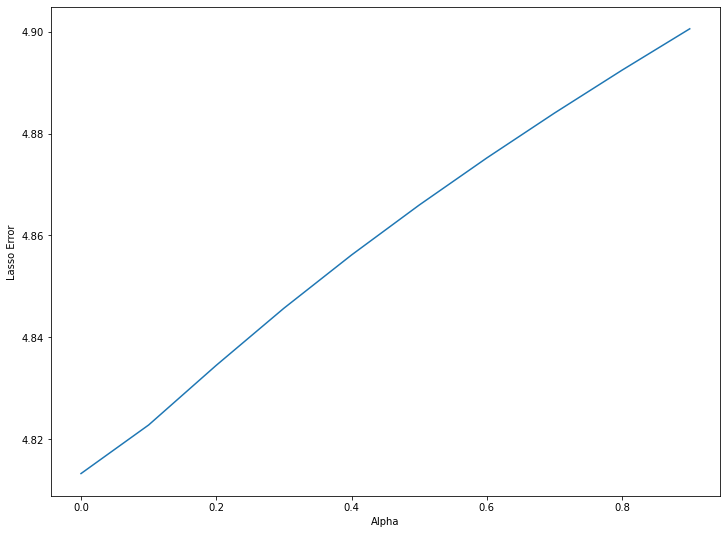

In [8]:
alphas = np.arange(0.0,1.0,0.1)
print(alphas)

plt.plot(alphas,ridgeE)
plt.xlabel('Alpha')
plt.ylabel('Lasso Error')